# <center>  Eyes Classification  <center>

<hr style="border:2px  solid black"> </hr>

**AIM:** To implement a classifier using neural network using Keras framework to determine the gender by eye.

### TABLE OF CONTENTS
    
1. [Importing the Libraries](#lib_import)
2. [Data Preparation](#data_prep)
3. [Exploring the 'Eye Classification' Dataset](#explore-ds)    

4. [Data Modelling](#dm)
    * [SVC Model ](#scal)
    * [MLP using keras](#tts)
    * [CNN ](#cnn)        
       
5. [Conclusion](#cln)

6. [Overall Observation](#ob)

7. [References](#ref)

<hr style="border:.1px  solid  gray"> </hr>

## <CENTER> IMPORTING THE LIBRARIES<a name="lib_import"></a>

<hr style="border:01px  solid gray"> </hr>

In [1]:
#importing the lib

import numpy as np
import pandas as pd
import sklearn as sk

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import datetime as dt
import os
import os.path
from pathlib import Path
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, SpatialDropout2D
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing import image
from PIL import Image
from skimage.transform import resize
from skimage.io import imread


In [2]:
# getting the path of the dataset
female_dir = Path('C:/Users/.../dataset/femaleeyes')
male_dir = Path('C:/Users/.../dataset/maleeyes')
male_dir

WindowsPath('C:/Users/.../dataset/maleeyes')

In [3]:
# Selecting all the images in the dataset path
femaleeyes_filepaths = list(female_dir.glob(r'**/*.jpg'))
maleeyes_filepaths = list(male_dir.glob(r'**/*.jpg'))
maleeyes_filepaths[1]

WindowsPath('C:/Users/.../dataset/maleeyes/1.jpg')

<hr style="border:01px  solid gray"> </hr>

## <center>DATA PREPARATION <a name="data_prep"></a>

<hr style="border:01px  solid gray"> </hr>




In [4]:
# Mapping the labels to 0,1
fm_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], femaleeyes_filepaths))
ml_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], maleeyes_filepaths))
fm_labels[1]

'femaleeyes'

In [5]:
# Paths & labels femalee eyes
fm_filepaths = pd.Series(femaleeyes_filepaths, name = 'File').astype(str)
fm_labels = pd.Series(fm_labels, name='Label')

# Paths & labels malee eyes
ml_filepaths = pd.Series(maleeyes_filepaths, name = 'File').astype(str)
ml_labels = pd.Series(ml_labels, name='Label')

# Concatenating...
femaleeyes_df = pd.concat([fm_filepaths, fm_labels], axis=1)
maleeyes_df = pd.concat([ml_filepaths, ml_labels], axis=1)

df = pd.concat([femaleeyes_df, maleeyes_df])

#final df
df = df.sample(frac = 1, random_state = 56).reset_index(drop = True)

***

<b>OBSERVATION:</b>

* In this section, we performed data preparation steps.
* Since the dataset has female eyes and male eyes in seperate folders, we will be concatenating the folders and mapping them.
* Female eyes `label` is 0 and Male eyes is 1. 
* The new data is stored in `df`. 

***

<hr style="border:01px  solid gray"> </hr>

## <center>EXPLORING THE EYE CLASSIFICATION DATASET<a name="explore-ds"></a>
    

<hr style="border:01px  solid gray"> </hr>

Here, we would be exploring the dataset in general, like the below: 

* Shape, column names and size of the dataset
* Distribution in target variable `label`.
* Descirptive statistics.
* Datatype and overview . 
* Count of values of each feature and the target variable.

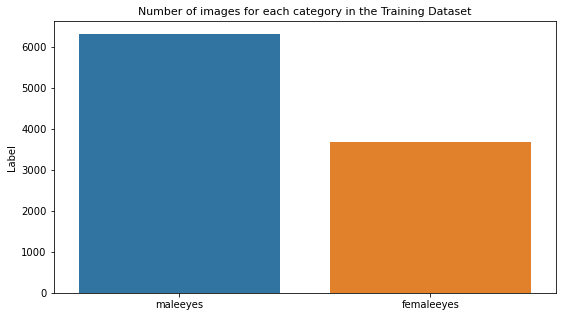

In [6]:
# target vraible distribution
td = df['Label'].value_counts()
plt.figure(figsize = (9, 5))
sns.barplot(x = td.index, y = td)
plt.title("Number of images for each category in the Training Dataset", fontsize = 11)
plt.show()

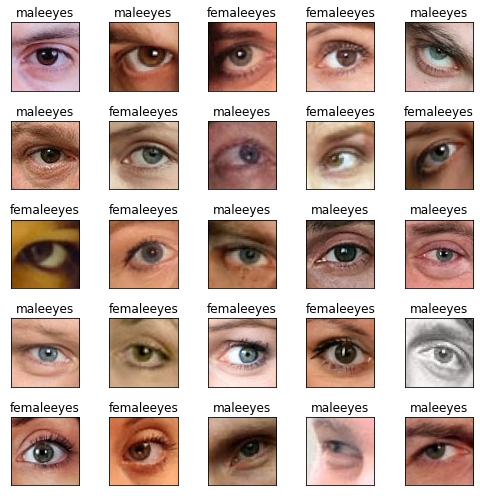

In [7]:
#displaying first 25 images
fig, axes = plt.subplots(nrows = 5,
                        ncols = 5,
                        figsize = (7, 7),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["File"][i]))
    ax.set_title(df["Label"][i])
plt.tight_layout()
plt.show()

In [8]:
#info and head details
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   File    10001 non-null  object
 1   Label   10001 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


,File,Label
0,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
1,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
2,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,femaleeyes
3,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,femaleeyes
4,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes



***

<b>OBSERVATION:</b>

* In this section, the dataset is explored.
* From `cell 6` , the `barplot` is used to depict the variations in the target variable. 
    * We observe that the dirstibution is more in `maleyes`contributing to 6k plus images. 
    * It is lighlty imabalanced.
    * Female eyes has about 3k images. 
* In `cell 7` , the first 25 images in teh dataset is read using `imread` and displayed with the respective label.
* `Cell 8` shows the descriptive statistivs and data type info about the dataset `df`. 
* First five records are displayed where we see that the df has two columns --> `File` and `Label`. 
    
    
NOTE : Since the target variable is highly imbalanced , sampling is vital for prediction.Also transforming the features would be mandatory to bring them in range prior prediction because of uneven distribution.

***




<hr style="border:01px  solid gray"> </hr>

## <center>DATA MODELLING<a name="dm"></a>

<hr style="border:01px  solid gray"> </hr>


1. [SVC Model ](#scal)
2. [MLP using keras](#tts)
3. [CNN ](#cnn) 

### 1. SVC : <a name="scal"></a>

In [9]:
dataframe = df.copy()

In [10]:
#getting the images for train test
dir = 'C:/Users/../ds/train'
dir
Categories=['fem_TRIAL' , 'mal_TRIAL']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir= dir
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data =np.array(flat_data_arr)
target=np.array(target_arr)
dataframe =pd.DataFrame(flat_data) #dataframe
dataframe['Target']=target
X =dataframe.iloc[:,:-1] #input data 
y =dataframe.iloc[:,-1] #output data


loading... category : fem_TRIAL
loaded category:fem_TRIAL successfully
loading... category : mal_TRIAL
loaded category:mal_TRIAL successfully


In [11]:
#df info and head 
dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 67501 entries, 0 to Target
dtypes: float64(67500), int32(1)
memory usage: 98.9 MB


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.245905,0.146150,0.060733,0.249252,0.148753,0.063709,0.245220,0.145617,0.060125,0.241188,...,0.957598,0.726226,0.663481,0.949691,0.718318,0.655573,0.956256,0.724883,0.662138,0
1,0.853412,0.614275,0.465333,0.849961,0.609725,0.459686,0.856863,0.618824,0.470980,0.863765,...,0.972157,0.833529,0.721765,0.974667,0.831804,0.718471,0.973412,0.832667,0.720118,0
2,0.087852,0.051067,0.044902,0.090092,0.053307,0.044902,0.086545,0.049761,0.044902,0.082998,...,0.546316,0.487492,0.468978,0.545287,0.486464,0.467026,0.545937,0.487113,0.468259,0
3,0.818831,0.748243,0.732557,0.817584,0.746996,0.731310,0.820301,0.749713,0.734026,0.823017,...,0.853399,0.776301,0.748850,0.851156,0.775179,0.747728,0.852186,0.775694,0.748243,0
4,0.177825,0.142069,0.120466,0.168417,0.133083,0.108600,0.176024,0.140348,0.118194,0.185432,...,0.578047,0.446178,0.429146,0.577736,0.445867,0.428834,0.578121,0.446252,0.429219,0


In [12]:
# applying GridSearchCV
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
SVM_model=GridSearchCV(svc,param_grid)

In [13]:
#train_test aplit and training the model

%%time
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=77, stratify = y)

SVM_model.fit(X_train,Y_train)

print("*******************************************")
print("Time taken to fit the model: ")

*******************************************
Time taken to fit the model: 
Wall time: 8min 30s


In [14]:
# dir_test = Path('C:/Users/../ds/')

In [15]:
#best params
display(SVM_model)
print("The best parameters are: " , SVM_model.best_params_)



GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

The best parameters are:  {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}


In [16]:
#prediction on test set
from sklearn.metrics import accuracy_score

y_pred=SVM_model.predict(X_test)


In [17]:
#Accuracy on test set
print(f" Accuracy using SVM is  {accuracy_score(y_pred,Y_test)*100}% ")

 Accuracy using SVM is  79.48717948717949% 


In [18]:
#print("")

In [19]:
#classification report
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.85      0.77      0.81        22

    accuracy                           0.79        39
   macro avg       0.79      0.80      0.79        39
weighted avg       0.80      0.79      0.80        39



***

<b>OBSERVATION:</b>


* In `cell 10` , only for the SVM classifier, a small dataset is used. As the dataset count is more, processing time and efficiency needed is huge. Therefore due to processor constraints, a small datset of 200 records are used which after normalization is 67k columns. 
* As **SVC** accepts only **2D** images and not 4D , the images are resized and flattened.i.e., they are normalized. 
* The dataset is split into 80 :20 ratio in `cell 13`. Also, since class imbalance exists, we use `stratify = y` . 
* **GridSearchCV** is performed in `cell 12` where the hyperpaameters passed are `param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}`
* In `cell13` , SVC classifier is fit to the X_train and Y_train and we infer the time taken for 200 actual images are 8 min 30sec.  
* In `cell 15`, **best parameters** are displayed. `The best parameters are:  {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}`.
* In `cell 16` , the best params are used to make predicition on the X_test set. 
* An **accuracy of 79.48%** is acheived using SVC. 
* CLassification reoprts states that model has done a pretty good work in predicition whwere the values of `precsion` ,`recall` and `F1` score ranges between  75-85%. 


***

### Data Modelling - MLP and CNN:

In the below sections, as CNN and MLP processes faster than SVM, the whole dataset of about 10k images will be considered and modelling , evaluation will be done. 

In [20]:
# train test split 
trainset_df, testset_df = train_test_split(df, test_size= 0.20, random_state= 80)

In [21]:
# view head
display(trainset_df.head())

testset_df.head()


,File,Label
8336,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
229,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
7974,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
6021,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
8369,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,femaleeyes


,File,Label
6273,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
7450,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
6458,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
8625,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
3141,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,femaleeyes


In [22]:
# converting the Label to a numeric format for testing later
LE = LabelEncoder()

y_test = LE.fit_transform(testset_df["Label"])

In [23]:
#view head after label encoding
display(testset_df[1:9])
display(y_test[1:9])

,File,Label
7450,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
6458,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
8625,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
3141,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,femaleeyes
3500,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
6879,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
8226,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes
8253,C:\Users\Hp\Desktop\AI_CANADA\SEM 2\Neural Net...,maleeyes


array([1, 1, 1, 0, 1, 1, 1, 1])

In [24]:
# Viewing data in training dataset
print('Training Dataset:')

print(f'Number of images: {trainset_df.shape[0]}')

print(f'Number of images with malee eyes: {trainset_df["Label"].value_counts()[0]}')
print(f'Number of images with femalee eyes: {trainset_df["Label"].value_counts()[1]}\n')

# Viewing data in test dataset
print('Test Dataset:')

print(f'Number of images: {testset_df.shape[0]}')

print(f'Number of images with malee eyes: {testset_df["Label"].value_counts()[0]}')
print(f'Number of images with femalee eyes: {testset_df["Label"].value_counts()[1]}\n')

Training Dataset:
Number of images: 8000
Number of images with malee eyes: 5056
Number of images with femalee eyes: 2944

Test Dataset:
Number of images: 2001
Number of images with malee eyes: 1267
Number of images with femalee eyes: 734



In [25]:
# ImageDataGenerator generates batches of tensor image data with real-time data augmentation.

train_datagen = ImageDataGenerator(rescale = 1./255,# normalize pixel values between 0-1
                                    shear_range = 0.2,#specify the range in which to decrease/increase shear value
                                    zoom_range = 0.1,# zoom in by 10%
                                    rotation_range = 20,# random rotation by 20 degrees
                                    width_shift_range = 0.1,# shift the width of the image 10%
                                    height_shift_range = 0.1,# shift the height of the image 10%
                                    horizontal_flip = True,# 180 degree flip horizontally
                                    vertical_flip = True,# 180 degree flip vertically
                                    validation_split = 0.1)# 10% of the data will be used for validat

test_datagen = ImageDataGenerator(rescale = 1./255)


In [26]:
# flow_from_directory() takes the path to a directory & generates batches of augmented data.


print("Preparing the training dataset ...")
training_set = train_datagen.flow_from_dataframe(
    dataframe = trainset_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode = "rgb",
    class_mode = "binary",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "training")

print("Preparing the validation dataset ...")
validation_set = train_datagen.flow_from_dataframe(
    dataframe = trainset_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode ="rgb",
    class_mode = "binary",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "validation")

print("Preparing the test dataset ...")
test_set = test_datagen.flow_from_dataframe(
    dataframe = testset_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode ="rgb",
    class_mode = "binary",
    shuffle = False,
    batch_size = 32)

print('Data generators are ready!')


Preparing the training dataset ...
Found 7200 validated image filenames belonging to 2 classes.
Preparing the validation dataset ...
Found 800 validated image filenames belonging to 2 classes.
Preparing the test dataset ...
Found 2001 validated image filenames belonging to 2 classes.
Data generators are ready!


In [27]:
# getting the final shape 
print("Training: ")
print(training_set.class_indices)
print(training_set.image_shape)
print("---" * 8)
print("Validation: ")
print(validation_set.class_indices)
print(validation_set.image_shape)
print("---" * 8)
print("Test: ")
print(test_set.class_indices)
print(test_set.image_shape)

Training: 
{'femaleeyes': 0, 'maleeyes': 1}
(75, 75, 3)
------------------------
Validation: 
{'femaleeyes': 0, 'maleeyes': 1}
(75, 75, 3)
------------------------
Test: 
{'femaleeyes': 0, 'maleeyes': 1}
(75, 75, 3)


***

**OBSERVATION** 


* In ImageDataGenerator, 
    * the images are re-scaled for better processing.
    * the `validation_split=0.1`  is set to consider 10% of the data to be used for validation at end of each epoch along with the training data. 
    
* In data preparation section, the data set is split into `training_set` ,  `validation_set` and `test_set. Count of the classes are got in each set.

* Size of image is set to 128 with batchsize = 32

### 2. Multi Layer Perceptron <a name="tts"></a>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#model creation
MLP = Sequential([
                    Flatten(input_shape = (75,75,3)),
                    Dense(units = 512  , activation = 'relu'), 
                    Dense(units = 512 , activation = 'relu'),
                    Dense(units = 512 , activation = 'relu'),
                    Dense(units = 512 , activation = 'relu'),
                    Dense(units = 512 , activation = 'relu'),
                    Dense(1,activation = 'sigmoid')
                    ])


In [29]:
#model summary
MLP.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16875)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               8640512   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
 # Compiling the model
MLP.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Start of count time
start = dt.datetime.now()

# Training the model
MLP_Model = MLP.fit(training_set, epochs = 50, validation_data = validation_set)

# End of counting time
end = dt.datetime.now()
time_MLP = end - start
print ('\nTraining and validation time is: ', time_MLP)    
    

Epoch 1/50
225/225 [==============================] - 24s 104ms/step - loss: 0.6566 - accuracy: 0.6282 - val_loss: 0.6414 - val_accuracy: 0.6375
Epoch 2/50
225/225 [==============================] - 28s 122ms/step - loss: 0.6441 - accuracy: 0.6326 - val_loss: 0.6251 - val_accuracy: 0.6400
Epoch 3/50
225/225 [==============================] - 28s 124ms/step - loss: 0.6335 - accuracy: 0.6408 - val_loss: 0.6086 - val_accuracy: 0.6775
Epoch 4/50
225/225 [==============================] - 22s 100ms/step - loss: 0.6178 - accuracy: 0.6592 - val_loss: 0.5983 - val_accuracy: 0.6925
Epoch 5/50
225/225 [==============================] - 22s 98ms/step - loss: 0.6048 - accuracy: 0.6803 - val_loss: 0.6006 - val_accuracy: 0.6675
Epoch 6/50
225/225 [==============================] - 22s 99ms/step - loss: 0.5972 - accuracy: 0.6774 - val_loss: 0.5727 - val_accuracy: 0.6888
Epoch 7/50
225/225 [==============================] - 22s 99ms/step - loss: 0.5882 - accuracy: 0.6888 - val_loss: 0.5739 - val_accur

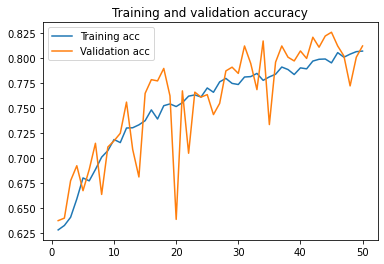

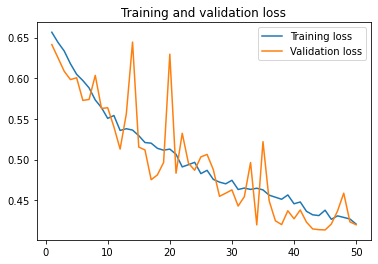

In [32]:
#plotting the accuracy and loss graph
acc = MLP_Model.history['accuracy']
val_acc = MLP_Model.history['val_accuracy']
loss = MLP_Model.history['loss']
val_loss = MLP_Model.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.legend()

plt.show()

In [33]:
#pred on test set
y_pred_MLP = MLP.predict(test_set)
y_pred_MLP = np.round(y_pred_MLP)

recall_MLP = recall_score(y_test, y_pred_MLP)
precision_MLP = precision_score(y_test, y_pred_MLP)
f1_MLP = f1_score(y_test, y_pred_MLP)
roc_MLP = roc_auc_score(y_test, y_pred_MLP)

In [34]:
#classification report
print(classification_report(y_test, y_pred_MLP))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       734
           1       0.89      0.87      0.88      1267

    accuracy                           0.85      2001
   macro avg       0.84      0.84      0.84      2001
weighted avg       0.85      0.85      0.85      2001



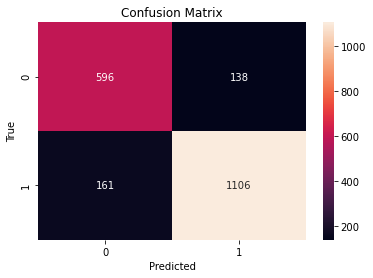

In [35]:
#confusion matrix

plt.figure(figsize = (6, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_MLP),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

***

<b>OBSERVATION:</b>


* In `cell 28` , model creation is done.
    * a sequential model is created using keras using `from tensorflow.keras.models import Sequential`. 
    * the input are flattened to perform better and faster. 
    * 5 dense layers with 512 units are passed with `relu` activation function. 
    * Since it is a binary class classification problem, `sigmoid` activation function is used for output dense layer. 
    
    
* In `cell 29`, the MLP model summary is got.
                `Total params: 9,691,649
                Trainable params: 9,691,649`
                
* In `cell 31` , model is compiled 
    * with hyperparameters like `optimizer = sgd` and `loss = binary_crossentropy`. 
    * model is fit to the training and validation set with `epoch = 50 ` 
    * For ** 50 epochs** time taken for training and vlaidation was `Training and validation time is:  0:27:52.214119`
    
    
* In `cell 32` , MLP classifiers training /validation accuracy and loss are plotted wfor 50 epochs. 
* There is no overfitting observed . Hence no regularizers and dropout parameter were used 
     * The **Training accuracy**  improved from 62% to 80% and **Training loss** improved from 0.65 to 0.42.
    * Similarly the **Validation accuracy** improved from 63% to 81% and **Validation loss** from 0.64 to 0.40. 
* In `cell 33`,  predicition on the test set is made. 
* An **accuracy of 85%** is acheived using MLP in `cell 34`. 
* CLassification reoprts states that model has done a pretty good work in predicition where the values of `precsion` ,`recall` and `F1` score ranges between  80-89%. 
* In `cell 35` confusion matrix is plotted where 1106+596 labels were correctly identified.


***

### 3. Convolution Neural Network <a name="cnn"></a>

In [37]:
# model instantiation 

CNN = Sequential()
CNN.add(Conv2D(32, (3, 3), input_shape = (75, 75, 3), activation = 'relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size = (2, 2)))
CNN.add(Conv2D(32, (3, 3), kernel_regularizer = regularizers.l2(0.0001) , activation = 'relu'))
CNN.add(MaxPooling2D(pool_size = (2, 2)))
CNN.add(Conv2D(64, (3, 3), activation = 'relu'))
CNN.add(SpatialDropout2D(0.2))
CNN.add(MaxPooling2D(pool_size = (2, 2)))
CNN.add(Flatten())
CNN.add(Dense(units = 128,kernel_regularizer=regularizers.l2(0.0001), activation = 'relu'))
CNN.add(Dropout(0.2))
CNN.add(Dense(units = 256,kernel_regularizer=regularizers.l2(0.0001), activation = 'relu'))
# Output layer (binary classification)
CNN.add(Dense(units = 1, activation = 'sigmoid'))


In [38]:
#CNN model summary
print(CNN.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 73, 73, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 15, 15, 64)       

In [39]:
# Compiling the model
CNN.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Start of count time
start = dt.datetime.now()

#set callback values
cb = [EarlyStopping(monitor = 'loss', mode = 'min', patience = 15, restore_best_weights = True)]

# Training the CNN model
CNN_model = CNN.fit(training_set, epochs = 50, validation_data = validation_set, callbacks = cb)

# End of count time 
end = dt.datetime.now()
time_CNN = end - start
print ('\nTraining and validation time is: ', time_CNN)

Epoch 1/50
225/225 [==============================] - 74s 317ms/step - loss: 0.6524 - accuracy: 0.6772 - val_loss: 0.6527 - val_accuracy: 0.6938
Epoch 2/50
225/225 [==============================] - 71s 316ms/step - loss: 0.5289 - accuracy: 0.7644 - val_loss: 0.5132 - val_accuracy: 0.7887
Epoch 3/50
225/225 [==============================] - 71s 313ms/step - loss: 0.4725 - accuracy: 0.7989 - val_loss: 0.5068 - val_accuracy: 0.7625
Epoch 4/50
225/225 [==============================] - 72s 317ms/step - loss: 0.4330 - accuracy: 0.8164 - val_loss: 0.4502 - val_accuracy: 0.8200
Epoch 5/50
225/225 [==============================] - 71s 316ms/step - loss: 0.4059 - accuracy: 0.8251 - val_loss: 0.4069 - val_accuracy: 0.8375
Epoch 6/50
225/225 [==============================] - 72s 318ms/step - loss: 0.3772 - accuracy: 0.8467 - val_loss: 0.4427 - val_accuracy: 0.8175
Epoch 7/50
225/225 [==============================] - 71s 313ms/step - loss: 0.3599 - accuracy: 0.8590 - val_loss: 0.4401 - val_ac

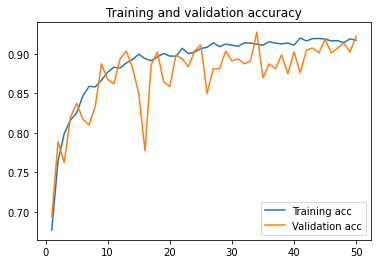

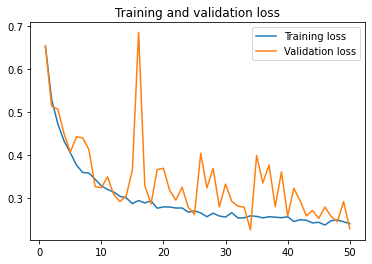

In [40]:
#plotting the accuracy and loss graph
acc = CNN_model.history['accuracy']
val_acc = CNN_model.history['val_accuracy']
loss = CNN_model.history['loss']
val_loss = CNN_model.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.legend()

plt.show()

In [41]:
#evaluation on test set 
score_CNN = CNN.evaluate(test_set)
print("Test Loss:", score_CNN[0])
print("Test Accuracy:", score_CNN[1])

63/63 [==============================] - 5s 75ms/step - loss: 0.1941 - accuracy: 0.9345
Test Loss: 0.1941455900669098
Test Accuracy: 0.9345327615737915


In [42]:
#prediction on test set 
import warnings
warnings.filterwarnings('ignore')
y_pred_CNN = CNN.predict(test_set)
y_pred_CNN = np.round(y_pred_CNN)

recall_CNN = recall_score(y_test, y_pred_CNN)
precision_CNN = precision_score(y_test, y_pred_CNN)
f1_CNN = f1_score(y_test, y_pred_CNN)
roc_CNN = roc_auc_score(y_test, y_pred_CNN)

In [43]:
#classification report
print(classification_report(y_test, y_pred_CNN))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       734
           1       0.94      0.96      0.95      1267

    accuracy                           0.93      2001
   macro avg       0.93      0.92      0.93      2001
weighted avg       0.93      0.93      0.93      2001



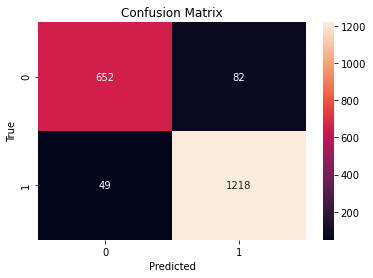

In [44]:
# plot confusion matrix
plt.figure(figsize = (6, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_CNN),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

***

<b>OBSERVATION:</b>


* In `cell 37` , a CNN model creation is done.
    * a sequential model is created using keras using `from tensorflow.keras.models import Sequential`. 
    * 3 conv2D layers are passed with size 32,32 and 64 respectively. 
    * the input are flattened to perform better and faster. 
    * 2 dense layers with 128 and 256 units are passed with `relu` activation function. 
    * Since it is a binary class classification problem, `sigmoid` activation function is used for output dense layer.
    * `kernel_regularizer = regularizers.l2(0.0001)` is passed . 
    * To avoid overfit and to outperform the above two models, **BatchNormalization** and **Dropout** are passed.
    
    
* In `cell 38`, the MLP model summary is got.
                       `Total params: 463,585
                       Trainable params: 463,521`                   
                
* In `cell 39` , model is compiled 
    * with hyperparameters like `optimizer = rmsprop` and `loss = binary_crossentropy`. 
    * model is fit to the training and validation set with `epoch = 50 ` 
    * For ** 50 epochs** time taken for training and validation was `Training and validation time is:  0:59:22.839021` 
    
    
* In `cell 40` , CNN classifiers training /validation accuracy and loss are plotted for 50 epochs. 
    * There is no overfitting observed .
    * The **Training accuracy**  improved from 67% to 91% and **Training loss** improved from 0.65 to 0.24.
    * Similarly the **Validation accuracy** improved from 69% to 92% and **Validation loss** from 0.65 to 0.22. 
    

* In `cell 41` , an accuracy of **93.45%** and test loss of 0.19 is acheived. 

* In `cell 42`,  predicition on the test set is made. 

* CLassification reoprts states that model has done a pretty good work in predicition where the values of `precsion` ,`recall` and `F1` score ranges between  89 - 95%. 
* In `cell 44` confusion matrix is plotted where 131 records were misclassified among 2001 records. Overall 1870 images were classified by CNNmodel.


***

<hr style="border:01px  solid gray"> </hr>

## <center>CONCLUSION<a name="cln"></a>

<hr style="border:01px  solid gray"> </hr>

* From the above implementation and evalutaion, we can say for this particular model of classifying human eyes with SVM, MLP and CNN , **CNN outperformed the other two models**
* With **CNN** considering all the features and images, 
        * the maximum accuracy achieved was 93%.
        * It is well suited for this dataset as it has 10k+ records. 
        * It is capable of doing high computational work. 
        * The loss score achieved is 0.1.Thus indicating a super fit model. 
        * The loss decreases and accuracy increases. 
        * Regularization and BatchNormalization played a major role in boosting the performance.


* Model can be improved further by hyper parameter tuning and  cross  validation. Also, different epochs could be implemented. Variations can be checked for and compared.


<hr style="border:.03px  solid black"> </hr> <a name="ob"></a>
<hr style="border:.03px  solid black"> </hr> <a name="ob"></a>

# <center>OVERALL OBSERVATION</b></center>

**1. With respect to sklearn classifier - SVM and KNN  :** 
* SVM was able to perform faster only with lesser data. To run the whole data, the computational time needed was more.
* For 200 images the processing time taken was roughly 10mins. Therefore, if considering all the 10k images , the time taken roughly would be 12-16hours which is out of scope at the moment. 
* Knn Classifier  took longer computational time when compared to SVM as it had to calcualte all the neraby points to make decsion . ALso with Knn classifier, the accuracy achived was as low as 58%. 
* Hence **SVC was preferred over Knn classifier** for this model of classifying human eyes which gave an **accuracy of 79%**
 

**2. With respect to initializing the model and compiling them:**
* Since binary class classification problem : 
    - output layer = sigmoid was prefered.
    - loss function = binaryCrossentropy .
    - metrics = accuracy.
    
* MLP :
    * `optimzer = adagrad` -->  processing time was quiker than that of `sgd`.However the maximum accuracy was 80%. 
    * `optimizer = rmsprop` --> maximum accuracy was 42%. Least of all.
    * `optimizer = adam` --> gave an accuracy of 77%.   
    * `Optimizer = sgd` gave good results accounting to **88%** . 
    *  With less epoch , graph was abnormal . With increase in epoch , loss reduced and accuracy improved

* CNN :
    * `optimizer = rmsprop` ---> took longer computational time close to an hour but yielded the best accuracy percentage of 93%.
    * `optimizer = adam`----> longer computational time with 90% accuracy.
    * With less epoch , graph was abnormal . With increase in epoch , loss reduced and accuracy improved.    
    

**3.With respect to regularization techniques:**
* MLP :
    * With dropout and kernel regularizers, MLP model accuracy decreased as low as 60%.
    * MLP performed the best without applying any overfitting techniques like Dropout and BatchNormalization.
* CNN :
    * But with CNN, regularization technique played a maor role in boosting the performance. 
    * Model graph is not overfitting. 
    * With "dropout" regularization technique, the loss value decreased and accuracy increased , as neurons are dropped at random in the training phase during each iteration which helped in achieving pretty good results as much as **93%**



**REFERENCES:** <a name="ref"></a>

- https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
- https://keras.io/examples/vision/mlp_image_classification/
- https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/
- https://www.kaggle.com/lucasar/detection-of-male-female-eyes-convnet-92-acc#6.-Construction-of-the-first-model-(ConvNet)